<a href="https://colab.research.google.com/github/NDsasuke/Gradient-decent--simplex-method--Binary-linear-programming/blob/main/Simplex%20Method/Maximization_Problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This segment imports the necessary libraries for the code. numpy is imported as np for numerical operations, and linprog from scipy.optimize is imported to solve the linear programming problem using the Simplex Method.

In [2]:
# Import the required libraries
import numpy as np
from scipy.optimize import linprog

This segment defines the maximization problem. The coefficients c represent the coefficients of the objective function that needs to be maximized. The matrix A represents the coefficients of the inequality constraints on the left-hand side, and the vector b represents the right-hand side of the inequality constraints.

In [3]:
# Define the maximization problem
c = [-2, -3]  # Coefficients of the objective function to maximize (negated for minimization)

A = [[1, 2],  # Coefficients of the inequality constraints (left-hand side)
     [1, -1]]

b = [5, 4]  # Right-hand side of the inequality constraints

This segment converts the maximization problem to a minimization problem. It negates the objective function coefficients by multiplying them by -1. This is necessary because the linprog function in scipy.optimize solves minimization problems by default.

In [4]:
# Convert the maximization problem to a minimization problem
c = [-x for x in c]


This segment solves the linear programming problem using the linprog function from scipy.optimize. The c represents the coefficients of the objective function (after conversion to minimization), A_ub represents the coefficients of the inequality constraints on the left-hand side, b_ub represents the right-hand side of the inequality constraints, and method='simplex' specifies that the Simplex Method should be used for solving.

In [5]:
# Solve the linear programming problem using the Simplex Method
result = linprog(c, A_ub=A, b_ub=b, method='simplex')


<ipython-input-5-9e055897bef0>:2: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result = linprog(c, A_ub=A, b_ub=b, method='simplex')


This segment extracts the solution and objective function value from the result object obtained from solving the linear programming problem. The variable x represents the optimal values of the decision variables, and obj_val represents the optimal objective function value (which is negated back to maximization).

In [6]:
# Extract the solution and objective function value
x = result.x  # Optimal values of the decision variables
obj_val = -result.fun  # Optimal objective function value (negated back to maximization)


This segment prints the results of the maximization problem. It displays the optimal solution by printing the values of the decision variables (x1, x2, etc.) and the optimal objective function value.

In [7]:
# Print the results
print("Optimal Solution:")
for i in range(len(x)):
    print("x" + str(i + 1) + " =", x[i])
print("Objective Function Value:", obj_val)

Optimal Solution:
x1 = 0.0
x2 = 0.0
Objective Function Value: -0.0


Visualization

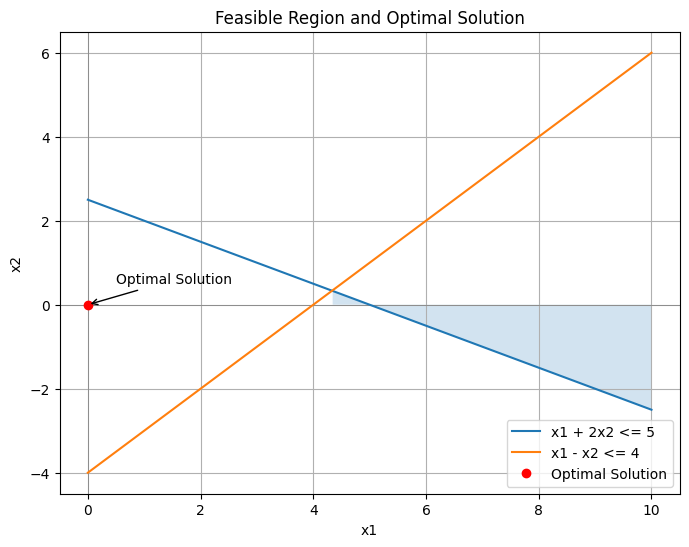

In [9]:
import matplotlib.pyplot as plt

# Plot the feasible region and the optimal solution
plt.figure(figsize=(8, 6))
plt.axvline(0, color='gray', linewidth=0.5)
plt.axhline(0, color='gray', linewidth=0.5)

# Plot the feasible region defined by the constraints
x_vals = np.linspace(0, 10, 100)
y1_vals = (5 - x_vals) / 2
y2_vals = x_vals - 4
plt.plot(x_vals, y1_vals, label='x1 + 2x2 <= 5')
plt.plot(x_vals, y2_vals, label='x1 - x2 <= 4')
plt.fill_between(x_vals, np.minimum(y1_vals, y2_vals), where=(y1_vals <= y2_vals), alpha=0.2)

# Plot the optimal solution
plt.plot(x[0], x[1], 'ro', label='Optimal Solution')
plt.annotate('Optimal Solution', (x[0], x[1]), xytext=(x[0] + 0.5, x[1] + 0.5),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Feasible Region and Optimal Solution')
plt.legend()
plt.grid(True)
plt.show()